In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
df = pd.read_csv('../data/las-vegas_nv.csv', parse_dates=True, index_col='date').drop(columns=['city', 'state'])
df.sort_index(inplace=True)
df

,humidity (%),precipitation (in),avg_temp (°F),pressure (hPa),wind (mph)
date,,,,,
2021-09-23,19,0.0,86,1014,12
2021-09-24,24,0.0,85,1012,9
2021-09-25,23,0.0,83,1013,8
2021-09-26,32,0.0,83,1012,10
2021-09-27,38,0.0,83,1011,12
...,...,...,...,...,...
2024-03-07,26,0.0,61,1006,18
2024-03-08,49,0.0,57,1011,20
2024-03-09,20,0.0,54,1020,23


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 901 entries, 2021-09-23 to 2024-03-11
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   humidity (%)        901 non-null    int64  
 1   precipitation (in)  901 non-null    float64
 2   avg_temp (°F)       901 non-null    int64  
 3   pressure (hPa)      901 non-null    int64  
 4   wind (mph)          901 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 42.2 KB


In [14]:
print(f"Avg temp in 2023 was {round(df.loc['2023', 'avg_temp (°F)'].mean(), 2)}°F")

Avg temp in 2023 was 69.81°F


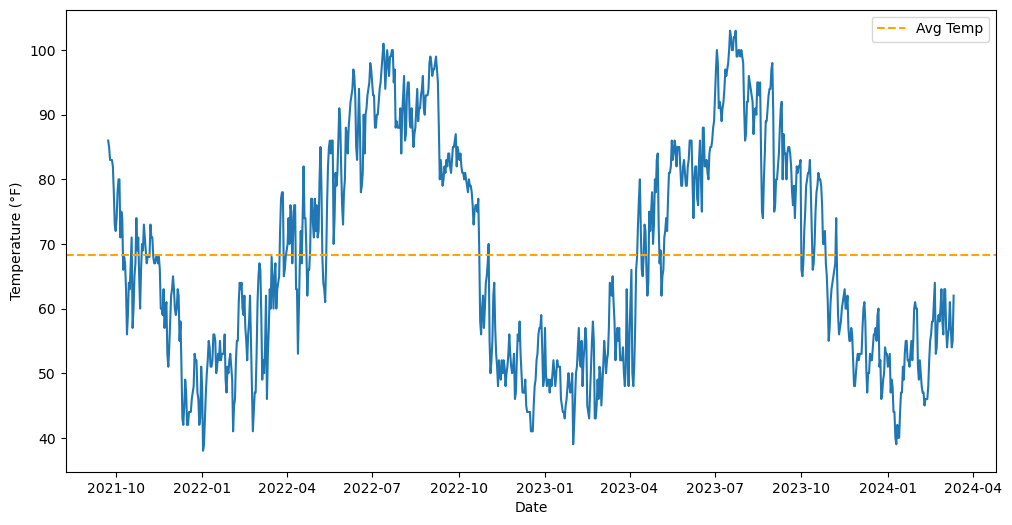

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(df['avg_temp (°F)'])
plt.axhline(df['avg_temp (°F)'].mean(), color='orange', linestyle='--', label='Avg Temp')
plt.ylabel('Temperature (°F)')
plt.xlabel('Date')
plt.legend();

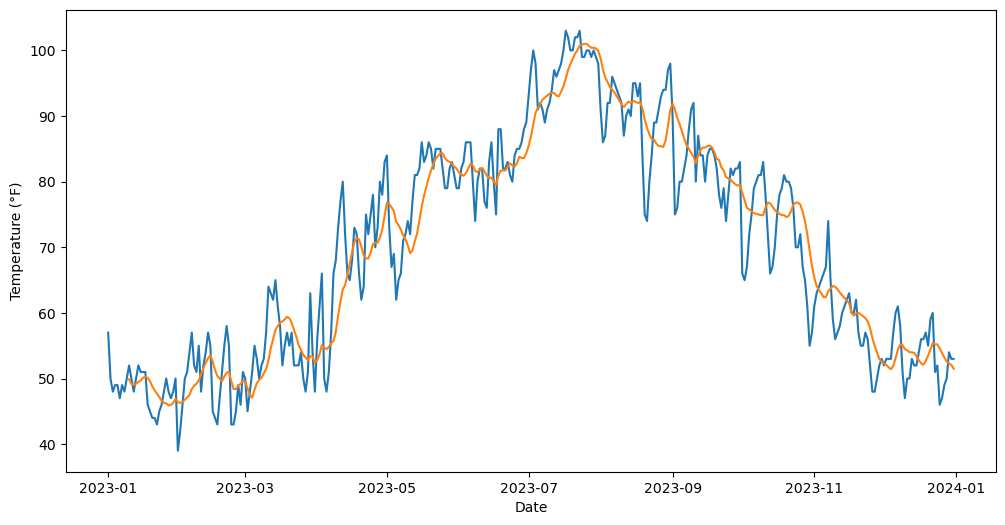

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(df.loc['2023', 'avg_temp (°F)'])
sns.lineplot(df.loc["2023", "avg_temp (°F)"].rolling(window=10).mean());
plt.ylabel('Temperature (°F)')
plt.xlabel('Date');

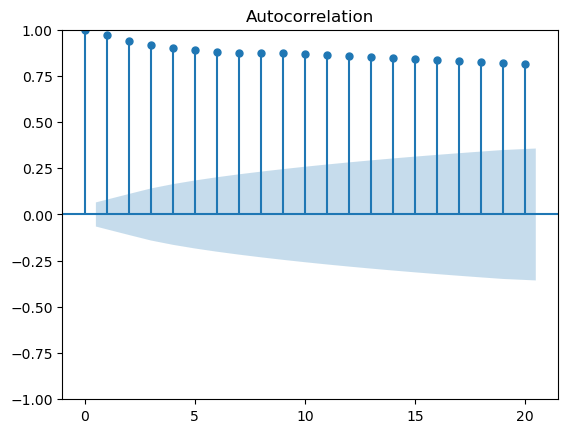

In [8]:
plot_acf(df['avg_temp (°F)'], lags=20);

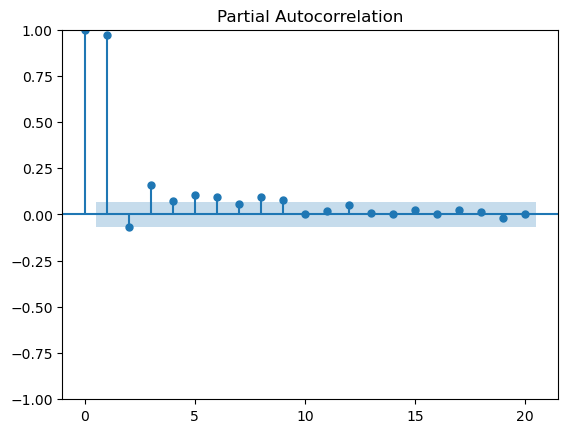

In [9]:
plot_pacf(df['avg_temp (°F)'], lags=20);

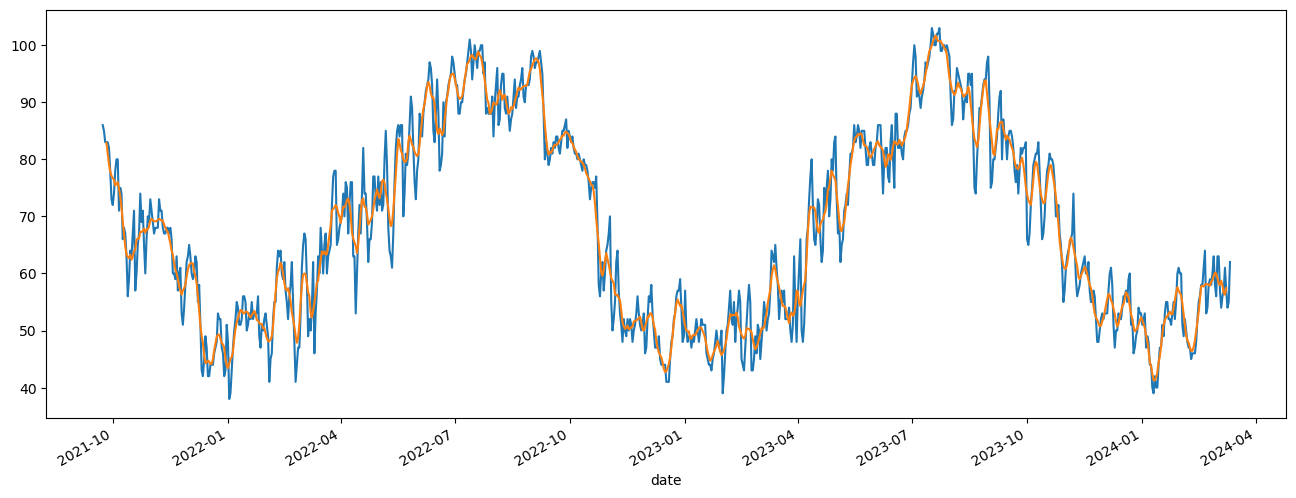

In [10]:
decomp = seasonal_decompose(df['avg_temp (°F)'])

plt.figure(figsize=(16, 6))
plt.plot(df['avg_temp (°F)'])
decomp.trend.plot();

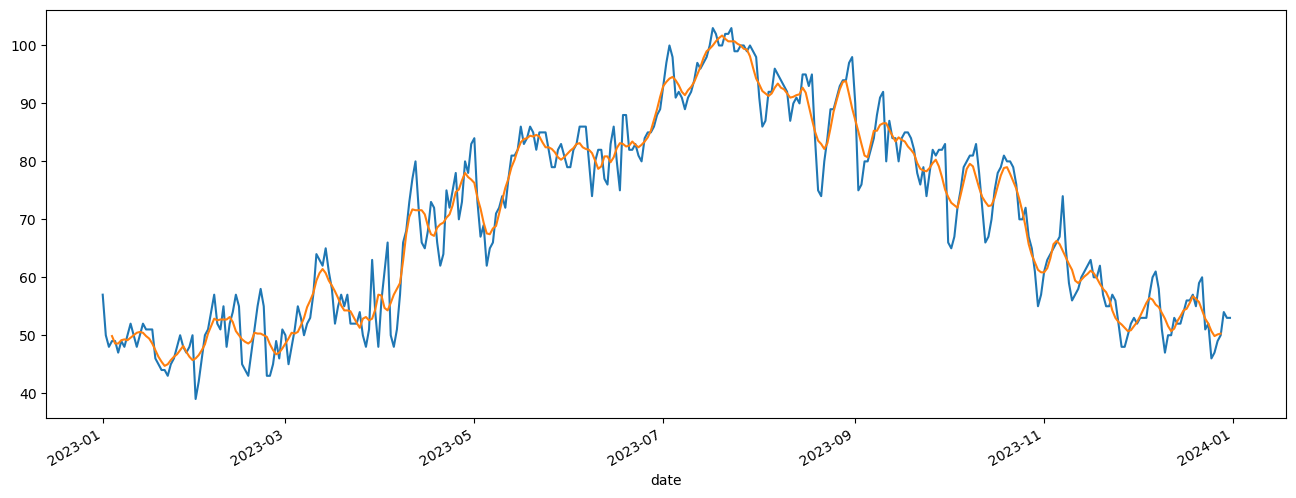

In [11]:
decomp = seasonal_decompose(df.loc['2023', 'avg_temp (°F)'])

plt.figure(figsize=(16, 6))
plt.plot(df.loc['2023', 'avg_temp (°F)'])
decomp.trend.plot();